In [1]:
import os
path = '/Users/lhs/.kaggle/input/novel-corona-virus-2019-dataset'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/lhs/.kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/Users/lhs/.kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/Users/lhs/.kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/Users/lhs/.kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/Users/lhs/.kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/Users/lhs/.kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/Users/lhs/.kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/Users/lhs/.kaggle/input/novel-corona-virus-2019-dataset/novel-corona-virus-2019-dataset.zip
/Users/lhs/.kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
cases = pd.read_csv('/Users/lhs/.kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv');

In [4]:
cases.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [15]:
import plotly.offline as py
import plotly.express as px

py.init_notebook_mode(connected=True)

grp = cases.groupby(['ObservationDate', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
grp = grp.reset_index()
grp['Date'] = pd.to_datetime(grp['ObservationDate'])
grp['Date'] = grp['Date'].dt.strftime('%m%d%Y')
grp['Active'] = grp['Confirmed']-grp['Recovered']-grp['Deaths']
grp['Country'] = grp['Country/Region']
grp = grp.sort_values(by=['Date', 'Active'], ascending=(True,False))
grp = grp.reset_index()
grp

/opt/anaconda3/envs/PythonDataScienceExam/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,index,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Date,Active,Country
0,3,01/22/2020,Mainland China,444.0,17.0,28.0,01222020,399.0,Mainland China
1,1,01/22/2020,Japan,2.0,0.0,0.0,01222020,2.0,Japan
2,6,01/22/2020,Thailand,2.0,0.0,0.0,01222020,2.0,Thailand
3,2,01/22/2020,Macau,1.0,0.0,0.0,01222020,1.0,Macau
4,4,01/22/2020,South Korea,1.0,0.0,0.0,01222020,1.0,South Korea
...,...,...,...,...,...,...,...,...,...
8852,8827,04/18/2020,South Sudan,4.0,0.0,0.0,04182020,4.0,South Sudan
8853,8689,04/18/2020,Bhutan,5.0,0.0,2.0,04182020,3.0,Bhutan
8854,8831,04/18/2020,Suriname,10.0,1.0,6.0,04182020,3.0,Suriname
8855,8793,04/18/2020,Nicaragua,9.0,2.0,6.0,04182020,1.0,Nicaragua


In [20]:
fig = px.choropleth(grp, locations='Country', locationmode='country names',
                   color='Confirmed', hover_name='Country/Region', hover_data=[grp.Recovered, grp.Deaths, grp.Active],
                   projection='mercator', animation_frame='Date', width=1000, height=700,
                   color_continuous_scale='Reds', range_color=[1000, 20000], title='Wolrd Map of Coronavirus')
fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)

## Machine Learning Algorithms Applied

In [21]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [22]:
path = '/Users/lhs/.kaggle/input/Data_Science_for_COVID19'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/lhs/.kaggle/input/Data_Science_for_COVID19/coronavirusdataset.zip
/Users/lhs/.kaggle/input/Data_Science_for_COVID19/SeoulFloating.csv
/Users/lhs/.kaggle/input/Data_Science_for_COVID19/TimeAge.csv
/Users/lhs/.kaggle/input/Data_Science_for_COVID19/SearchTrend.csv
/Users/lhs/.kaggle/input/Data_Science_for_COVID19/TimeProvince.csv
/Users/lhs/.kaggle/input/Data_Science_for_COVID19/Weather.csv
/Users/lhs/.kaggle/input/Data_Science_for_COVID19/PatientRoute.csv
/Users/lhs/.kaggle/input/Data_Science_for_COVID19/PatientInfo.csv
/Users/lhs/.kaggle/input/Data_Science_for_COVID19/Region.csv
/Users/lhs/.kaggle/input/Data_Science_for_COVID19/TimeGender.csv
/Users/lhs/.kaggle/input/Data_Science_for_COVID19/Case.csv
/Users/lhs/.kaggle/input/Data_Science_for_COVID19/Time.csv


In [26]:
df_patient = pd.read_csv(str(path+"/PatientInfo.csv"))
df_route = pd.read_csv(str(path+"/PatientRoute.csv"))

In [28]:
df_patient

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,7000000008,9457.0,female,NaN,10s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,NaN,2020-03-27,NaN,NaN,isolated
3249,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3250,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3251,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,NaN,NaN,2020-04-03,NaN,NaN,isolated


In [33]:
df_patient['country'].value_counts()

Korea            3118
China              10
United States       6
Thailand            2
Spain               1
Canada              1
Switzerland         1
France              1
Indonesia           1
Mongolia            1
Name: country, dtype: int64

In [35]:
df_patient.isna().sum()

patient_id               0
global_num            1171
sex                     53
birth_year             420
age                     61
country                111
province                 0
city                    76
disease               3235
infection_case         812
infection_order       3222
infected_by           2490
contact_number        2656
symptom_onset_date    2791
confirmed_date           0
released_date         2116
deceased_date         3193
state                    0
dtype: int64

In [37]:
df_patient.drop(columns=['global_num', 'age', 'city', 'symptom_onset_date'], inplace=True)
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       3253 non-null   int64  
 1   sex              3200 non-null   object 
 2   birth_year       2833 non-null   float64
 3   country          3142 non-null   object 
 4   province         3253 non-null   object 
 5   disease          18 non-null     object 
 6   infection_case   2441 non-null   object 
 7   infection_order  31 non-null     float64
 8   infected_by      763 non-null    float64
 9   contact_number   597 non-null    float64
 10  confirmed_date   3253 non-null   object 
 11  released_date    1137 non-null   object 
 12  deceased_date    60 non-null     object 
 13  state            3253 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 355.9+ KB


In [39]:
df_patient.shape

(3253, 14)

In [44]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val: val if val>0 else np.nan)
df_patient.confirmed_date = pd.to_datetime(df_patient.confirmed_date)
daily_count = df_patient.groupby(df_patient.confirmed_date).patient_id.count()
accumulated_count = daily_count.cumsum()
df_patient['age'] = 2020 - df_patient['birth_year']
df_patient

,patient_id,sex,birth_year,country,province,disease,infection_case,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1000000001,male,1964.0,Korea,Seoul,NaN,overseas inflow,1.0,NaN,75.0,2020-01-23,2020-02-05,NaN,released,56.0
1,1000000002,male,1987.0,Korea,Seoul,NaN,overseas inflow,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0
2,1000000003,male,1964.0,Korea,Seoul,NaN,contact with patient,2.0,2.002000e+09,17.0,2020-01-30,2020-02-19,NaN,released,56.0
3,1000000004,male,1991.0,Korea,Seoul,NaN,overseas inflow,1.0,NaN,9.0,2020-01-30,2020-02-15,NaN,released,29.0
4,1000000005,female,1992.0,Korea,Seoul,NaN,contact with patient,2.0,1.000000e+09,2.0,2020-01-31,2020-02-24,NaN,released,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,7000000008,female,NaN,Korea,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,2020-03-27,NaN,NaN,isolated,NaN
3249,7000000009,female,NaN,Korea,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,2020-03-29,NaN,NaN,isolated,NaN
3250,7000000010,female,NaN,Korea,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,2020-04-03,NaN,NaN,isolated,NaN
3251,7000000011,male,NaN,Korea,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,NaN,2020-04-03,NaN,NaN,isolated,NaN


In [47]:
import math
def group_age(age):
    if age >= 0:
        if age % 10 != 0:
            lower = int(math.floor(age / 10.0)) *10
            upper = int(math.ceil(age / 10.0)) *10-1
            return f"{lower}-{upper}"
        else:
            lower = int(age)
            upper = int(age + 9)
            return f"{lower}-{upper}"
    return "UnKnown"

df_patient['age_range'] = df_patient['age'].apply(group_age)
patient = df_patient

In [48]:
date_cols = ['confirmed_date', 'released_date', 'deceased_date']
for col in date_cols:
    patient[col] = pd.to_datetime(patient[col])

In [52]:
patient['time_to_release_since_confirmed'] = patient['released_date']-patient['confirmed_date']
patient['time_to_death_since_confirmed'] = patient['deceased_date']-patient['confirmed_date']
patient['duration_since_confirmed'] = patient[['time_to_release_since_confirmed', 'time_to_death_since_confirmed']].min(axis=1)
patient['duration_days'] = patient['duration_since_confirmed'].dt.days
age_ranges = sorted(set([ar for ar in patient['age_range'] if ar != 'Unknown']))
patient['state_by_gender'] = patient['state']+'_'+patient['sex']
released = df_patient[df_patient.state == 'released']
isolated_state = df_patient[df_patient.state == 'isolated']
dead = df_patient[df_patient.state == 'deceased']

#### Cehcking for number of confirmed

Text(0.5, 1.0, 'Accumulated Confirmed Count')

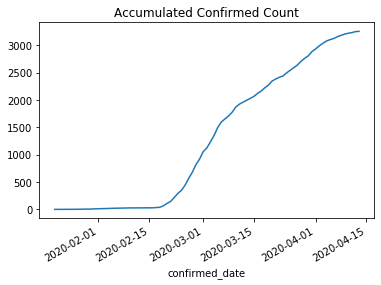

In [53]:
accumulated_count.plot()
plt.title('Accumulated Confirmed Count')

#### Checking for number of cluster

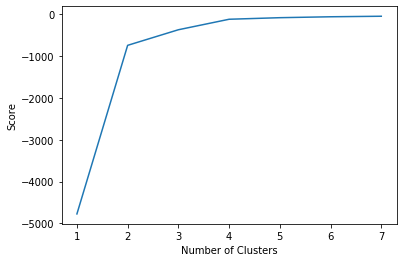

In [55]:
K_clusters = range(1,8)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_route[['latitude']]
X_axis = df_route[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

As in this graph, after 4 score go to constant value, so we will go with 3 clusters

#### K-Mean Clustering

In [59]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(clus[clus.columns[1:3]])
clus['cluster_label'] = kmeans.fit_predict(clus[clus.columns[1:3]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(clus[clus.columns[1:3]])

NameError: name 'clus' is not defined

In [60]:
clus.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

NameError: name 'clus' is not defined